# Model

---


For modeling, we'll aim to predict the math score based on the other variables in the dataset. We can use a regression model for this purpose. For simplicity, we'll use a linear regression model.

Let's start by splitting the dataset into training and testing sets and then train our model.

In [2]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
from google.colab import files

uploaded = files.upload()
import pandas as pd
data = pd.read_csv('exams.csv')

Saving exams.csv to exams.csv


In [4]:
data_encoded = pd.get_dummies(data, columns=[
    'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'
], drop_first=True)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splitting the dataset into training and testing sets
X = data_encoded.drop('math score', axis=1)
y = data_encoded['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = regressor.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)

mse


24.83855821054256

The Mean Squared Error (MSE) for our linear regression model on the test set is approximately
24.84. This metric provides an average of the squares of the errors between the predicted and actual math scores. A lower MSE indicates a better fit of the model to the data.

# Assess

---


In this phase, we'll evaluate the performance of our model using visualization. We'll plot the actual vs. predicted math scores to visually inspect the model's predictions.

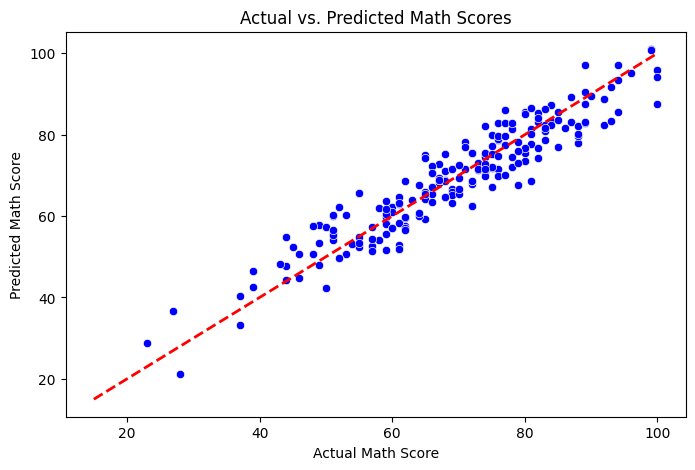

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correcting the scatter plot for actual vs. predicted math scores
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', lw=2, color='red')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs. Predicted Math Scores')
plt.show()


The scatter plot showcases the actual vs. predicted math scores. The red dashed line represents a perfect prediction. Observations closer to this line have accurate predictions, while those further away have larger prediction errors.

The model seems to perform reasonably well, as most predictions lie close to the red dashed line.